In [2]:
import pandas as pd 

wsdf = pd.read_csv('Ontario Weather Station Database.csv')

wsdf.head()


,IATA_ID,Name,WMO_ID,MSC_ID,Latitude,Longitude,Elevation(m),Data_Provider,Dataset/Network,AUTO/MAN,Province/Territory
0,COBQ,BELLEVILLE QUINTE,73042.0,6150690,44.15936,-77.4398,95.700,MSC,CA,AUTO,Ontario
1,COCE,CEDAR SPRINGS,73036.0,6131418,42.26497,-82.0163,181.973,MSC,CA,AUTO,Ontario
2,COCP,CHAPLEAU AIRPORT,73135.0,6061366,47.81926,-83.3564,447.856,MSC,CA,AUTO,Ontario
3,COGE,GERALDTON AIRPORT,73071.0,6042719,49.78091,-86.9324,349.970,MSC,CA,AUTO,Ontario
4,COGI,GUELPH TURFGRASS INSTITUTE,73073.0,6143092,43.54187,-80.2221,336.520,MSC,CA,AUTO,Ontario


In [3]:
location = 'Name'
latitude = 'Latitude'
longitude = 'Longitude'

weather_station_dictionary = {}

for index, row in wsdf.iterrows():
    location_temp = row[location]
    latitude_temp = row[latitude]
    longitude_temp = row[longitude]
    
    if location_temp in weather_station_dictionary:
        weather_station_dictionary[location_temp].append((latitude_temp, longitude_temp))       
    else:
        weather_station_dictionary[location_temp] = [(latitude_temp, longitude_temp)]

weather_station_dictionary
        

{'BELLEVILLE QUINTE': [(44.15936, -77.4398)],
 'CEDAR SPRINGS': [(42.26497, -82.0163)],
 'CHAPLEAU AIRPORT': [(47.81926, -83.3564)],
 'GERALDTON AIRPORT': [(49.78091, -86.9324)],
 'GUELPH TURFGRASS INSTITUTE': [(43.54187, -80.2221)],
 'OGOKI POST': [(51.65774, -85.9003)],
 'KING CITY NORTH': [(43.96353, -79.5741)],
 'SIOUX LOOKOUT AIRPORT': [(50.12312, -91.9047)],
 'SAULT STE. MARIE AIRPORT': [(46.47806, -84.5167)],
 'BIG TROUT LAKE': [(53.8164, -89.8916)],
 'TERRACE BAY AIRPORT': [(48.81527, -87.0917)],
 'PETERBOROUGH TRENT U EXPERIMENTAL FARM': [(44.35321, -78.2787)],
 'WEAGAMOW LAKE': [(52.94378, -91.316)],
 'FORT FRANCES RCS': [(48.65118, -93.439)],
 'BRANTFORD AIRPORT': [(43.13733, -80.3313)],
 'BROCKVILLE CLIMATE': [(44.63523, -75.7516)],
 'BEATRICE CLIMATE': [(45.13571, -79.3989)],
 'MOOSE CREEK WELLS': [(45.25123, -74.963)],
 'KINGSTON CLIMATE': [(44.218, -76.595)],
 'KENORA RCS': [(49.7905, -94.3612)],
 'LAKE SUPERIOR PROVINCIAL PARK': [(47.72305, -84.814)],
 'TIMMINS CLIMATE'

In [7]:
import math

def geocode_address(farm_address):
    return 42.996842, -80.675752

def calculate_distance(lat1, lon1, lat2, lon2):
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad
    a = math.sin(d_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    radius_of_earth = 6371  # Earth's radius in kilometers
    distance = radius_of_earth * c

    return distance

def locate_closest_weather_stations(farm_address):
    farm_lat, farm_long = geocode_address(farm_address)
    
    distances_to_ws = {}
    
    for key in weather_station_dictionary:
        value_list = weather_station_dictionary[key]
        for value_tuple in value_list:
            ws_lat, ws_long = value_tuple
            distance = calculate_distance(farm_lat, farm_long, ws_lat, ws_long)
            distances_to_ws[key] = distance
        
    sorted_distances_to_ws_list = sorted(distances_to_ws.items(), key=lambda x: x[1])
    sorted_distances_to_ws_dict = dict(sorted_distances_to_ws_list)
    
    closest_ws = []
    
    for key in sorted_distances_to_ws_dict:
        key_value = sorted_distances_to_ws_dict[key]
        closest_ws.append(f'{key}: {key_value}')
    
    return closest_ws[0], closest_ws[1], closest_ws[2] 

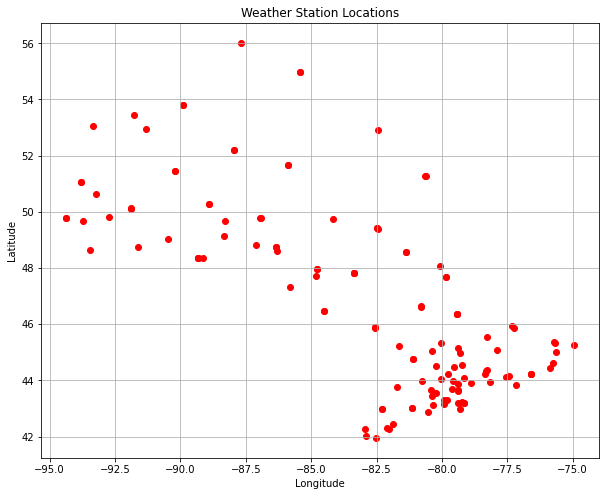

In [22]:
import matplotlib.pyplot as plt

lats = [lat for station in weather_station_dictionary.values() for lat, _ in station]
lons = [lon for station in weather_station_dictionary.values() for _, lon in station]

plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, color="red", marker='o')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Weather Station Locations")
plt.grid(True)
plt.show()

In [19]:
def find_triangle_points(farm_address, weather_station_dictionary):
    farm_lat, farm_long = farm_address

    distance_to_ws = {}
    for station_name, station_coords in weather_station_dictionary.items():
        ws_lat, ws_long = station_coords[0]
        distance = calculate_distance(farm_lat, farm_long, ws_lat, ws_long)
        distance_to_ws[station_name] = distance
    
    sorted_distances_to_ws = sorted(distance_to_ws.items(), key=lambda x: x[1])

    # find three closest stations that form a traingle
    for i in range(len(sorted_distances_to_ws) - 2):
        station1, dist1 = sorted_distances_to_ws[i]
        for j in range(i + 1, len(sorted_distances_to_ws) - 1):
            station2, dist2 = sorted_distances_to_ws[j]
            for k in range(j + 1, len(sorted_distances_to_ws)):
                station3, dist3 = sorted_distances_to_ws[k]

                lat1, lon1 = weather_station_dictionary[station1][0]
                lat2, lon2 = weather_station_dictionary[station2][0]
                lat3, lon3 = weather_station_dictionary[station3][0]
                # shoelace formula to calcualte signed area
                area = (lat1 * (lon2 - lon3) + lat2 * (lon3 - lon1) + lat3 * (lon1 - lon2)) / 2

                farm_area1 = (farm_lat * (lon2 - lon3) + lat2 * (lon3 - farm_long) + lat3 * (farm_long - lon2)) / 2
                farm_area2 = (lat1 * (farm_long - lon3) + farm_lat * (lon3 - lon1) + lat3 * (lon1 - farm_long)) / 2
                farm_area3 = (lat1 * (lon2 - farm_long) + lat2 * (farm_long - lon1) + farm_lat * (lon1 - lon2)) / 2
                # make sure the poitns aren't colinear (so it's a triangle) and check if farm is inside area of triangle
                if abs(area) > 0.0001 and (
                    (farm_area1 >= 0 and farm_area2 >= 0 and farm_area3 >= 0) or
                    (farm_area1 <= 0 and farm_area2 <= 0 and farm_area3 <= 0)
                ):
                    return station1, station2, station3
    return None, None, none


def plot_triangle(farm_address, weather_station_dictionary, station1, station2, station3):
    farm_lat, farm_long = farm_address

    triangle_stations = [weather_station_dictionary[station][0] for station in [station1, station2, station3]]

    plt.figure(figsize=(10, 8))
    plt.scatter(farm_long, farm_lat, color='blue', marker='x', label = 'Farm Address')
    plt.scatter([lon for lat, lon in triangle_stations], [lat for lat, lon in triangle_stations], color='red', marker='o', label='Weather Stations')

    # create the dashed lines
    plt.plot([farm_long, triangle_stations[0][1]], [farm_lat, triangle_stations[0][0]], 'b--')
    plt.plot([farm_long, triangle_stations[1][1]], [farm_lat, triangle_stations[1][0]], 'b--')
    plt.plot([farm_long, triangle_stations[2][1]], [farm_lat, triangle_stations[2][0]], 'b--')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Weather Station Locations')
    plt.legend()
    plt.grid(True)
    plt.show()


In [10]:
locate_closest_weather_stations('4301 Random Street')

('DELHI CS: 18.23681193490644',
 'BRANTFORD AIRPORT: 32.0465004578657',
 'LONDON CS: 38.60640795456666')

The three closest weather stations that form a triangle are: DELHI CS, BRANTFORD AIRPORT, LONDON CS


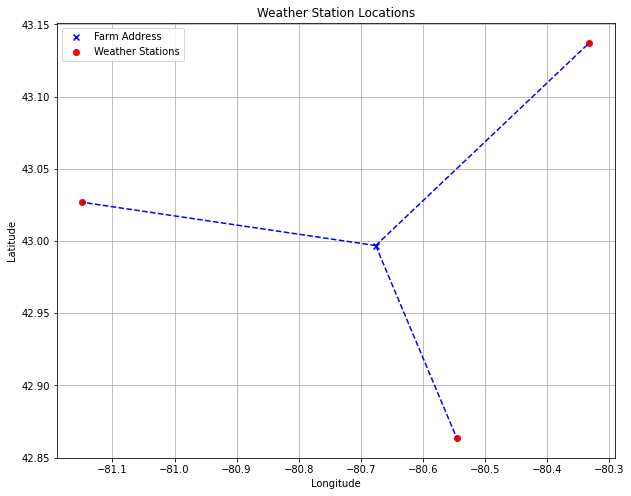

In [21]:
farm_address = geocode_address("123 ur mom street")

station1, station2, station3 = find_triangle_points(farm_address, weather_station_dictionary)

if station1 is not None:
    print(f"The three closest weather stations that form a triangle are: {station1}, {station2}, {station3}")
else:
    print("There are no weather stations that form a triangle sad life")

plot_triangle(farm_address, weather_station_dictionary, station1, station2, station3)